In [1]:
import random
import numpy as np
import pandas as pd
import sympy as sp
from sklearn import datasets
from matplotlib import pyplot as plt

In [2]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = pd.Series(diabetes.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
y = df['target'].values.reshape(-1,1)
x = df[['age', 'bmi', 'sex', 'bp']]
y = np.transpose(y)
x = np.transpose(x).values

In [4]:
m, n = np.shape(x)
numIterations= 400
alpha = 0.05
theta = np.ones(m).reshape(1, m)

In [5]:
counter_it = list()
counter_cost = list()
    
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    
    for i in range(0, numIterations):
        hypothesis = (theta @ x).reshape(1,n)
        loss = (hypothesis - y)
        cost = np.sum(loss ** 2) / (2 * m)
        if i % 50 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
        
        counter_it.append(i)
        counter_cost.append(cost)
        
        gradient = (loss @ xTrans) / m
        theta = theta - alpha * gradient
        
    plt.scatter(counter_it, counter_cost)
    return theta

Iteration 0 | Cost: 1605856.460876
Iteration 50 | Cost: 1499679.199266
Iteration 100 | Cost: 1481186.207165
Iteration 150 | Cost: 1476958.639932
Iteration 200 | Cost: 1475777.439513
Iteration 250 | Cost: 1475410.730717
Iteration 300 | Cost: 1475291.015358
Iteration 350 | Cost: 1475250.780676
[[  40.61878491  779.37173429 -105.28257971  419.34404197]]


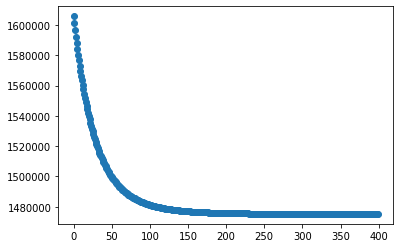

In [6]:
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)